In [8]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

# data.head()

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

sc = StandardScaler()
neigh = KNeighborsClassifier(n_neighbors=1)
p = make_pipeline(StandardScaler(), neigh)

# p.get_params()

In [21]:
from sklearn.dummy import DummyClassifier as dc
from sklearn.model_selection import cross_validate

# c = dc(strategy="most_frequent")
cv = cross_validate(p, data, target, cv=10, scoring="balanced_accuracy", return_train_score=True)

cv["train_score"], cv["test_score"]

(array([0.89750853, 0.88595273, 0.87990375, 0.88282773, 0.89357943,
        0.8744883 , 0.88188353, 0.86743421, 0.8785006 , 0.88344049]),
 array([0.51315789, 0.49122807, 0.5877193 , 0.27192982, 0.38596491,
        0.43859649, 0.56432749, 0.6622807 , 0.42156863, 0.50309598]))

 qué pasa si cambiamos los estratos?


In [28]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(random_state = 0, test_size=0.25, n_splits = 10)
cv = cross_validate(p, data, target, cv=ss, scoring="balanced_accuracy", return_train_score=True)

cv["train_score"], cv["test_score"]

(array([0.87234102, 0.88694639, 0.88844549, 0.90461659, 0.88046334,
        0.88344988, 0.90743432, 0.89527486, 0.87533464, 0.8887538 ]),
 array([0.61363636, 0.5857231 , 0.54457364, 0.52374031, 0.56268997,
        0.5779371 , 0.61416741, 0.5969622 , 0.57748801, 0.59234234]))

7)
 Vecinos: 1


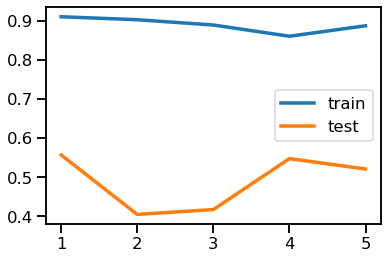

 
 Vecinos: 2


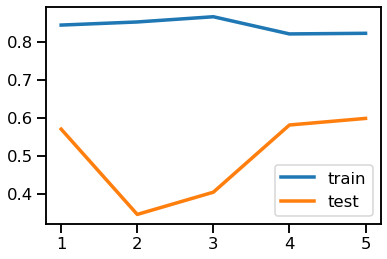

 
 Vecinos: 5


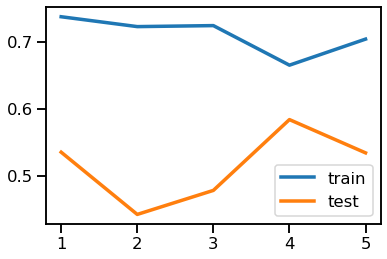

 
 Vecinos: 10


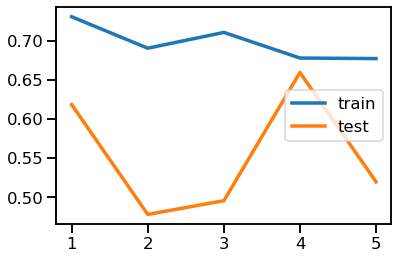

 
 Vecinos: 20


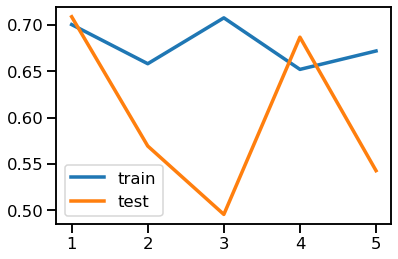

 
 Vecinos: 50


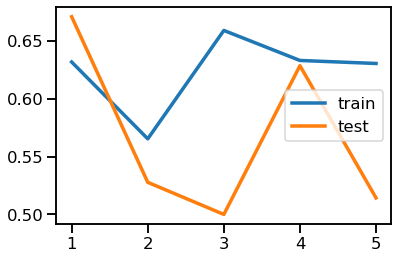

 
 Vecinos: 100


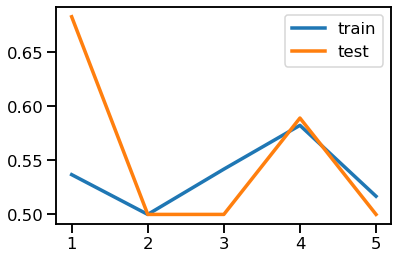

 
 Vecinos: 200


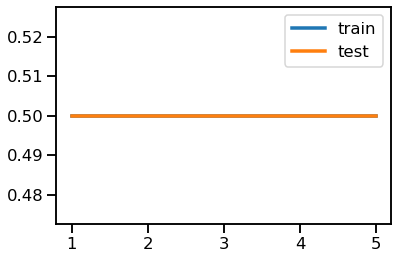

 
 Vecinos: 500


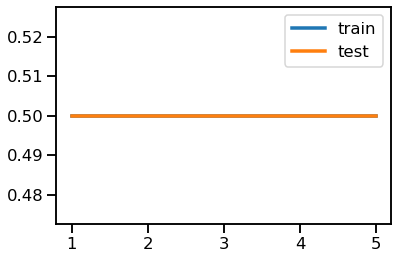

In [42]:
print("7)")
import matplotlib.pyplot as plt

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]

for n in param_range:
    print(f" Vecinos: {n}")
    neigh = KNeighborsClassifier(n_neighbors=n)
    p = make_pipeline(StandardScaler(), neigh)
    cv = cross_validate(p, data, target, cv=5, scoring="balanced_accuracy", return_train_score=True)
#     print(f" Train: {cv['train_score']} Test: {cv['test_score']}")
    x, y1, y2 = [1, 2,3,4,5], cv['train_score'], cv['test_score']
    plt.plot(x, y1, x, y2)
    plt.legend(["train", "test"])
    plt.show()
    print(" ")